<a href="https://colab.research.google.com/github/roh7itt/ML-Project/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import numpy as np
import pandas as pd

In [327]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [328]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
282,ham,Ok. I asked for money how far,NaN,NaN,NaN
3001,ham,"Excellent, I'll see what riley's plans are",NaN,NaN,NaN
2698,spam,FROM 88066 LOST å£12 HELP,NaN,NaN,NaN
2092,ham,"Oh, my love, it's soooo good to hear from you....",NaN,NaN,NaN
1188,ham,All will come alive.better correct any good lo...,NaN,NaN,NaN


In [329]:
df.shape

(5572, 5)

In [330]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [332]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [333]:
df.sample(5)

,v1,v2
4643,ham,Did u got that persons story
2244,ham,No management puzzeles.
2378,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
3942,ham,I got a call from a landline number. . . I am ...
1092,ham,Where r we meeting?


In [334]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2863,ham,What I'm saying is if you haven't explicitly t...
3975,ham,I wish u were here. I feel so alone
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...
18,ham,Fine if thatåÕs the way u feel. ThatåÕs the wa...
4709,ham,Ya i knw u vl giv..its ok thanks kano..anyway ...


In [335]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [336]:
df['target'] = encoder.fit_transform(df['target'])

In [337]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [338]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [339]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [340]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [341]:
df.duplicated().sum()

np.int64(0)

In [342]:
df.shape

(5169, 2)

2.EDA

In [343]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [344]:
df['target'].value_counts()

,count
target,
0,4516
1,653


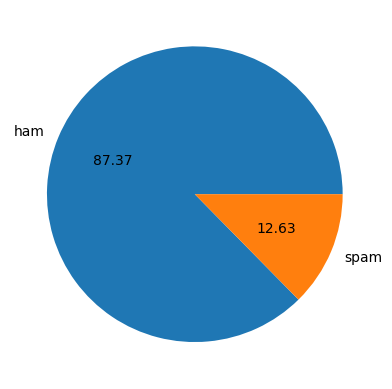

In [345]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [346]:
# Data is imbalanced

In [347]:
import nltk

In [348]:
!pip install nltk

In [349]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [350]:
df['num_characters'] = df['text'].apply(len)

In [351]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [352]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [353]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [354]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [355]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [356]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [357]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [358]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

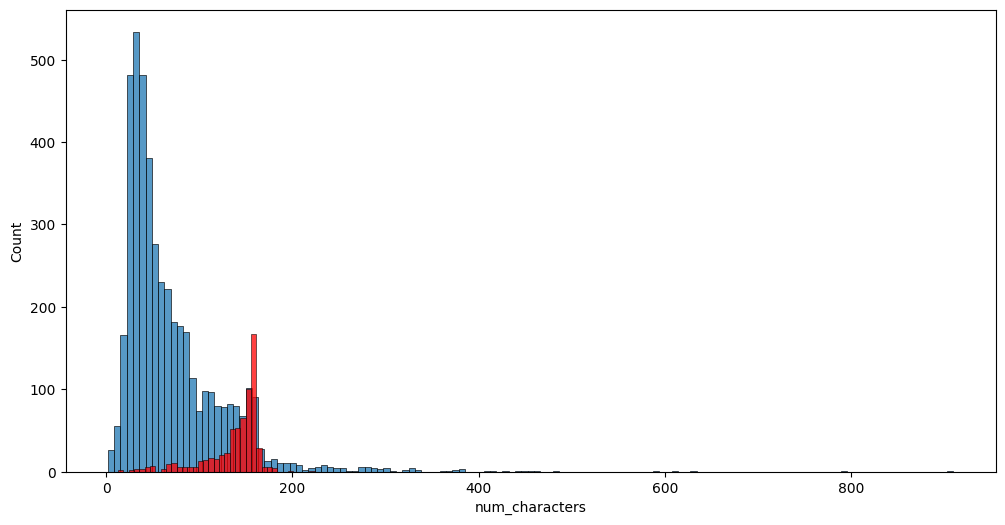

In [359]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

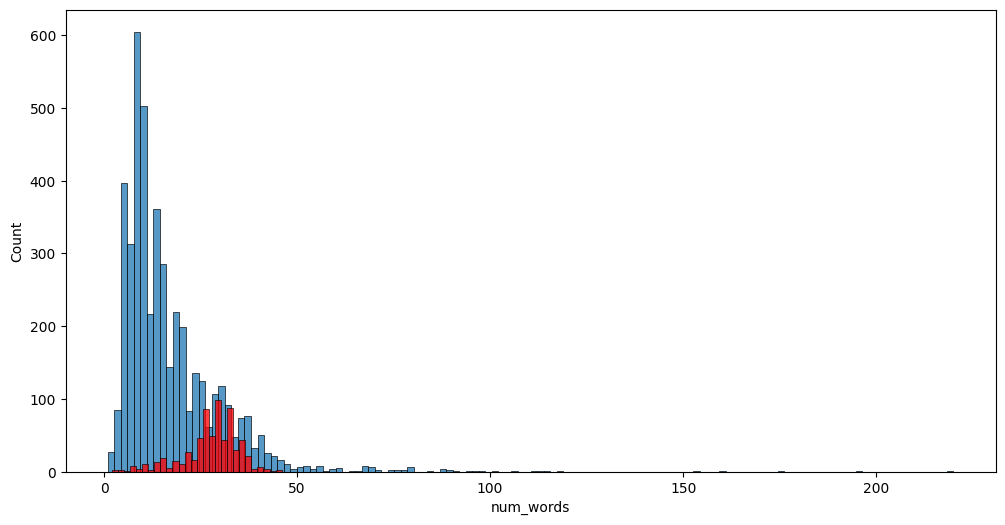

In [360]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

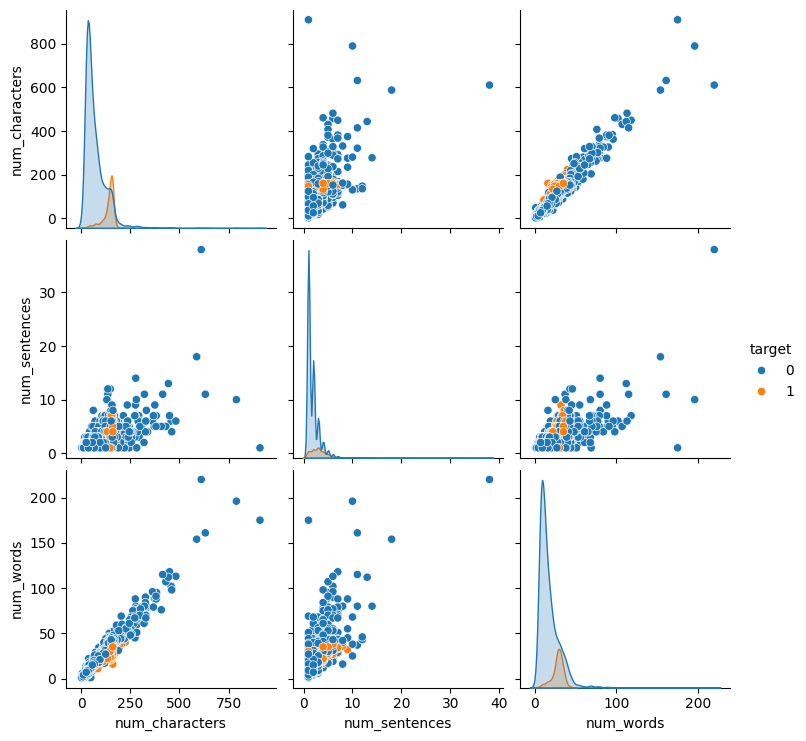

In [361]:
sns.pairplot(df,hue='target')

<Axes: >

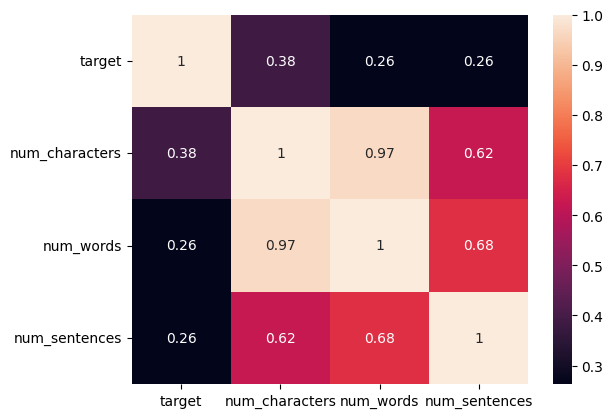

In [362]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

3. Data **Preprocessing**

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming





In [363]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [364]:
import string
from nltk.corpus import stopwords

In [365]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [366]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [367]:
df['transformed_text'] = df['text'].apply(transform_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
df.head()

In [369]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [368]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

NameError: name 'spam_wc' is not defined

<Figure size 1500x600 with 0 Axes>

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [370]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

NameError: name 'ham_wc' is not defined

<Figure size 1500x600 with 0 Axes>